In [71]:
# Feature models and correlations of patterns

In [1]:
import PcmPy as pcm
import numpy as np
import matplotlib.pyplot as plt
from numpy import sqrt

In [2]:
def plot_features(model):
    num_feature = model.Ac.shape[0]
    for i in range(num_feature):
        plt.subplot(1, num_feature, i+1)
        plt.imshow(model.Ac[i], cmap='seismic',vmin=-1, vmax=1)

# Demonstrate that a Feature-correlation model with 4 components is redundant
We should be able to get the same predictions with a feature model that has three components
 

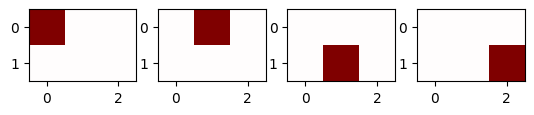

In [ ]:
# Simple case with 2 patterns (x and y) and
Ac= np.zeros((4,2,3))
Ac[0,0,0] = 1
Ac[1,0,1] = 1
Ac[2,1,1] = 1
Ac[3,1,2] = 1
M=pcm.FeatureModel('model',Ac)
plot_features(M)

In [74]:
# The same G-matrix can be predicted by different settings of the parameters 
theta1 = np.array([1,-1,0.5,1])
G,_ = M.predict(theta1)
G

array([[ 2.  , -0.5 ],
       [-0.5 ,  1.25]])

In [75]:
# Alternative solution 
theta2 = np.array([sqrt(1.75),-0.5,1,0.5])
G,_ = M.predict(np.array(theta2))
G

array([[ 2.  , -0.5 ],
       [-0.5 ,  1.25]])

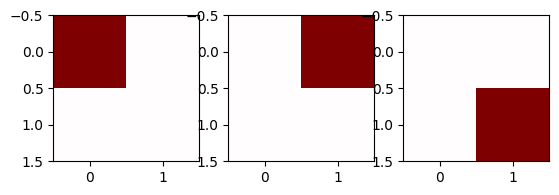

In [5]:
# More restricted feature model using only three features achieves the same G-matrix
Ac= np.zeros((3,2,2))
Ac[0,0,0] = 1
Ac[1,0,1] = 1
Ac[2,1,1] = 1
Mr=pcm.FeatureModel('model',Ac)
plot_features(Mr)

In [77]:
theta3 = np.array([sqrt(2-0.2),-0.5/sqrt(1.25),sqrt(1.25)])
G,_ = Mr.predict(theta3)
G

array([[ 2.  , -0.5 ],
       [-0.5 ,  1.25]])

In [ ]:
# Equivalence on the level of the paramters
def var1(theta):
    """ This is for the redundant 4-parameter version of the model """
    return [theta[0]**2 + theta[1]**2, theta[2]**2 + theta[3]**2, theta[1]*theta[2]]

def var3(theta):
    """ This is for the reducted 3-parameter version of the model """
    return [theta[0]**2 + theta[1]**2, theta[2]**2, theta[1]*theta[2]]

v1 = var1(theta1)
v2 = var1(theta2)
v3 = var3(theta3)

print('var1(theta1) =', v1)
print('var1(theta2) =', v2)
print('var3(theta3) =', v3)

var1(theta1) = [2.0, 1.25, -0.5]
var1(theta2) = [2.0, 1.25, -0.5]
var3(theta3) = [2.0, 1.2500000000000002, -0.5]


## Going into full feature space: does the overall amount of variance change? 

In [79]:
f1 = np.array([1,1,1,1,1,-1,-1,-1,-1,-1])
c1 = np.array([2,1,0,-1,-2,2,1,0,-1,-2])
f1=f1/sqrt(np.sum(f1**2))
c1=c1/sqrt(np.sum(c1**2))
Z = np.c_[f1,c1]

In [80]:
Bc= np.zeros((3,10,2))
Bc[0] = Z @ Mr.Ac[0]
Bc[1] = Z @ Mr.Ac[1]
Bc[2] = Z @ Mr.Ac[2]
Mf=pcm.FeatureModel('model',Bc)

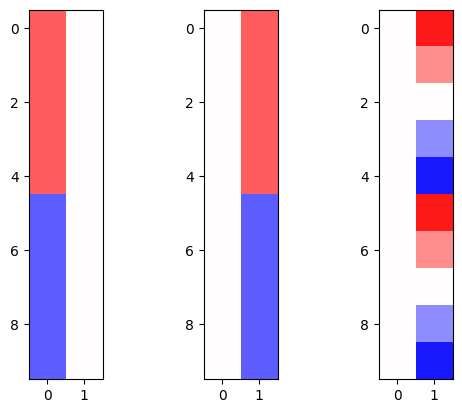

In [ ]:


plot_features(Mf)

var3(th3) = [1.04, 0.6400000000000001, -0.16000000000000003]
Trace of G matrix 1.68


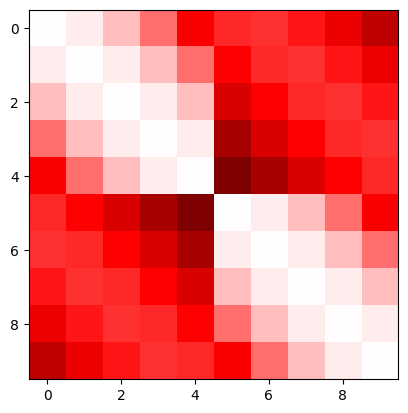

In [ ]:
th3 = np.array([sqrt(2-0.2),0.5/sqrt(1.25),sqrt(1.25)])
th3 = np.array([1,-0.2,0.8])
G,_ = Mf.predict(th3)
plt.imshow(pcm.util.G_to_dist(G), cmap='seismic', vmin=-1, vmax=1)
vx = var3(th3)
print('var3(th3) =', vx)
print('Trace of G matrix',np.trace(G))




## What if the two feature vectors are not orthogonal? 

In [83]:
f1 = np.array([1,1,1,1,-1,-1,-1,-1])
c1 = np.array([2,1,0,-1,1,0,-1,-2])
c1 = c1 - np.mean(c1)
f1=f1/sqrt(np.sum(f1**2))
c1=c1/sqrt(np.sum(c1**2))
Z = np.c_[f1,c1]

In [84]:
Z.T @ Z

array([[1.        , 0.40824829],
       [0.40824829, 1.        ]])

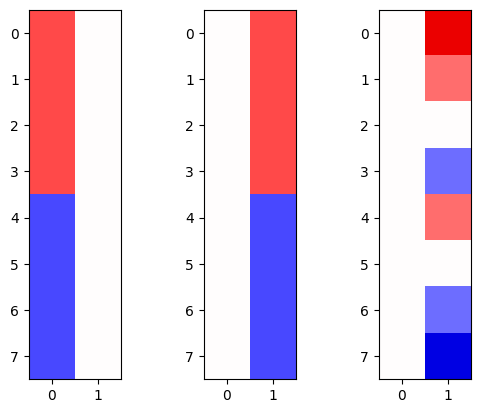

In [85]:
Cc= np.zeros((3,8,2))
Cc[0] = Z @ Mr.Ac[0]
Cc[1] = Z @ Mr.Ac[1]
Cc[2] = Z @ Mr.Ac[2]
Mn=pcm.FeatureModel('model',Cc)
plot_features(Mn)

var3(th3) = [1.3599999999999999, 0.6400000000000001, -0.48]
Trace of G matrix 1.6080816411546914


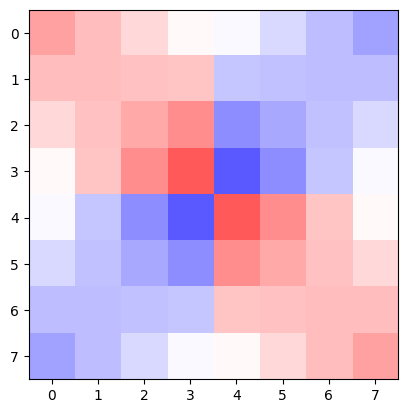

In [ ]:
th3 = np.array([1,-0.6,0.8])
G,_ = Mn.predict(th3)
plt.imshow(G, cmap='seismic', vmin=-1, vmax=1)
vx = var3(th3)
print('var3(th3) =', vx)
print('Trace of G matrix',np.trace(G))

In [90]:
# We can get the correct result overall, if we take into account the inner product of the features 
cv= f1@c1 # Inner product of the features
varX = [th3[0]**2, th3[1]**2 + th3[2]**2 + 2*cv*th3[1]*th3[2]]  
print('varX =', varX)
print('Trace of G matrix',np.trace(G))


varX = [1.0, 0.6080816411546914]
Trace of G matrix 1.6080816411546914
